# Probability Homework

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, norm, poisson

belize = pd.read_csv('../belize_airbnb_listings.csv')
belize.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


### 1.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
   ### a.	How do you choose your bin size?
   
##### Used Rice's rule to determine bin size. Rice’s rule is defined as: (cube root of the number of observations) * 2.

In [78]:
#Rice's rule to find bin size

bins1 = belize['reviews_per_month'].count()
bins2 = belize['number_of_reviews'].count()

mybins = round(bins1 ** (1/3)*2)
mybins2 = round(bins2 ** (1/3)*2)

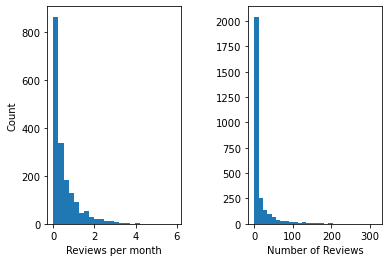

In [79]:
fig, ax = plt.subplots(1,2)

ax[0].hist(belize['reviews_per_month'],bins = mybins)
ax[1].hist(belize['number_of_reviews'], bins = mybins2)

ax[0].set_xlabel("Reviews per month")
ax[1].set_xlabel("Number of Reviews")
ax[0].set_ylabel('Count')

plt.subplots_adjust(wspace = 0.5)
plt.show()

### 2.	Create a box and whisker plot for availability_365. What does this show you?

##### This shows the lower (25%) quartile and upper (75%) quartile. There's also a big range between the highest and lowest value. 

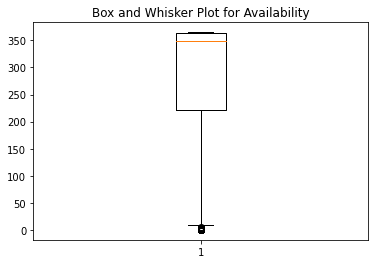

In [81]:
fig, ax = plt.subplots()
ax.boxplot(belize['availability_365'])
ax.set_title("Box and Whisker Plot for Availability")
plt.show()

### 3. What is the probability that the price for an Airbnb is under $50?
### a.	What do you notice about these records? Hint: look at the other columns.
### b.	What distribution does this data most closely fit?


##### The probability that the price for an Airbnb is less than $50 is 1.75%. For an Airbnb less than $50, there were more options in the Cayo and Belize Mainland neighbourhoods. A private room or an entire home/apt were more available. The distribution mostly fits a bimodal distribution because there are two peaks. 

In [28]:
price_less50 = belize[belize['price'] < 50]

price_less50['price'].count()/(belize['price'].count()) * 100

1.7525035765379111

In [88]:
print(price_less50['neighbourhood'].value_counts())
print(price_less50['room_type'].value_counts())

Cayo                    21
Belize Mainland         15
Stann Creek Mainland     6
Belize Islands           4
Toledo Mainland          2
Orange Walk              1
Name: neighbourhood, dtype: int64
Private room       27
Entire home/apt    13
Shared room         9
Name: room_type, dtype: int64


<AxesSubplot:xlabel='price', ylabel='Count'>

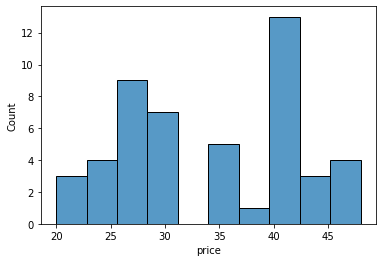

In [84]:
sns.histplot(x = 'price', data = price_less50, bins = 10)

### 4.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
   ### a.	Why sample variance and not population variance?
   ### b.	What is your takeaway for each metric?
   ### c.	What are the scales of measurement for each of these values? 

##### Population variance is done when using data obtained from the population. The Airbnb data is a sample data and that is why sample variance is done. 
##### For latitude and longitude, the variance and standard deviation is small; makes sense because the data is taken from a certain area, Belize. The variance for price is pretty high - which can also be seen on the box and whisker plot for this data. There is a big difference between the highest and lowest price. For the minimum nights, there is also a somewhat high degree of variance but the standard of devation follows the high variance. There is a high variance for the number of reviews and the standard deviation is also pretty high. The reviews per  month both have low variance and low std. There is also a high variance for the calculated host listings count and for the availablity of the airbnb.
##### For latititude and longitude, the scale of measurement is nominal because it can be used to describe a location. The rest of the data are interval scales of measurement. 

In [105]:
belize_data = belize.agg([np.var, np.std])
belize_data.drop(['id', 'host_id'], axis = 1)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
var,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157
std,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


### 5.	What percent of Airbnb listings in Belize are available 360 days a year or more?
### a.	360 days or less?
### b.	What distribution does this data most closely fit?

##### The percent of airbnb listings available 360 days or more is 39.5% and for 360 days less, it is 61.6%. The data skews to the left or availability more than 360 days. It is multimodal for 360 days or less. 

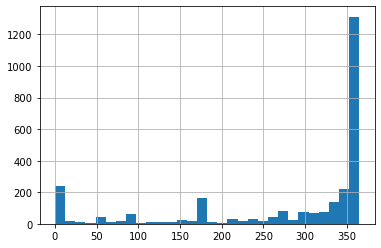

In [36]:
belize['availability_365'].hist(bins = 30)
plt.show()

In [100]:
more_360 = belize[belize['availability_365']>= 360]
less_360 = belize[belize['availability_365']<= 360]

more360_ans = round(more_360['availability_365'].count()/belize['availability_365'].count() * 100, 1)
print(more360_ans)
less360_ans = round(less_360['availability_365'].count()/belize['availability_365'].count() * 100, 1)
print(less360_ans)

39.5
61.6


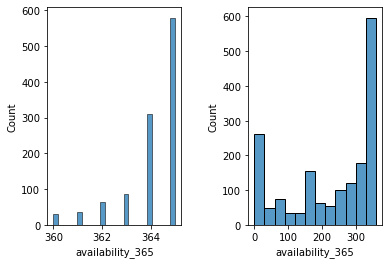

In [97]:
fig, ax = plt.subplots(1,2)
sns.histplot(ax = ax[0], x = 'availability_365', data = more_360)
sns.histplot(ax = ax[1], x = 'availability_365', data = less_360)

plt.subplots_adjust(wspace = 0.5)
plt.show()

### 6.	What minimum night count are 75% of Airnbnb listing in Belize greater than?

##### The minimum night count that 75% of airbnb listings are greater than is 1. This was done by uisng the describe function and using the 25% quartile. Also looking at the graph for minimum nights, it skews heavily towards 1.

In [48]:
belize['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64

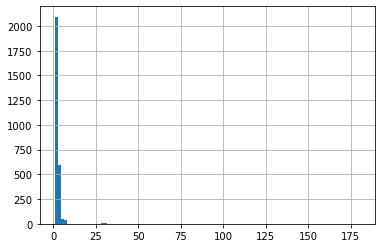

In [54]:
belize['minimum_nights'].hist(bins = 100)
plt.show()